In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 

In [6]:
data_train_collect = pd.read_pickle("Dataset_train_collect.pkl")

data_test_collect = pd.read_pickle("Dataset_test_collect.pkl")

In [13]:
beta = data_test_collect.values

# calculo de outliers
Q1 = data_train_collect.quantile(0.25)
Q3 = data_train_collect.quantile(0.75)
IQR = Q3 - Q1
#print("IQR is\n", IQR)

# eliminar outliers
df_out = data_train_collect[~((data_train_collect < (Q1 - 1.5 * IQR)) |(data_train_collect > (Q3 + 1.5 * IQR))).any(axis=1)]
beta[526]

array([ 9.80000019e-01, -5.77999949e-02, -1.20199978e-01,  3.72024536e-01,
        3.68919373e+00, -3.52478027e-03,  3.49093933e+01, -2.25219727e+00,
        2.00000000e+00])

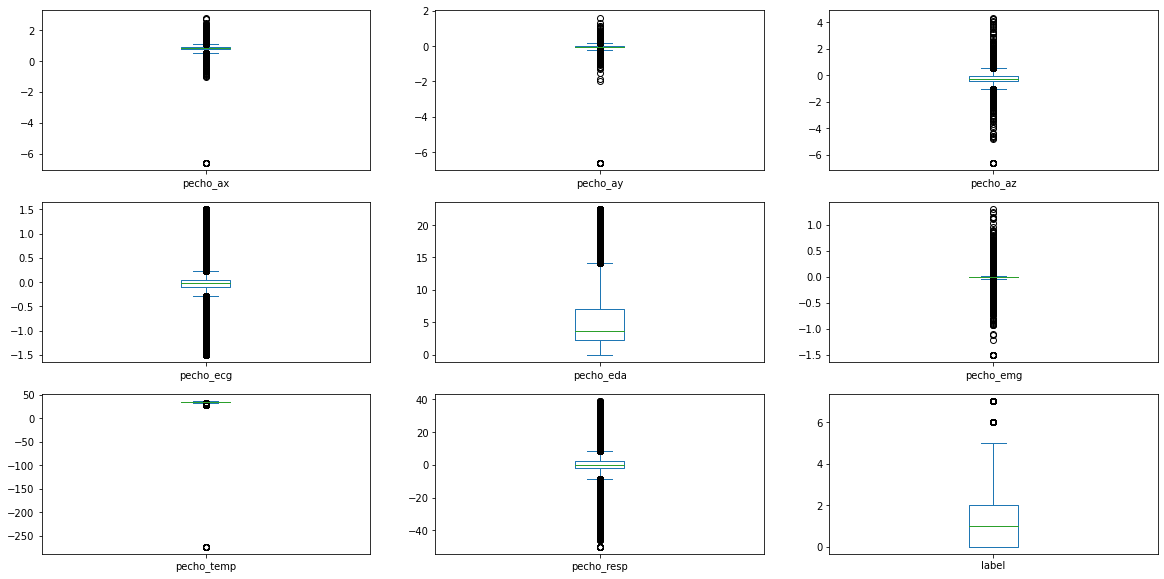

In [3]:
data_train_collect.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False ,figsize=(20,10))
plt.show()

In [3]:
# calculo de outliers
Q1 = data_train_collect.quantile(0.25)
Q3 = data_train_collect.quantile(0.75)
IQR = Q3 - Q1
#print("IQR is\n", IQR)

# eliminar outliers
df_out = data_train_collect[~((data_train_collect < (Q1 - 1.5 * IQR)) |(data_train_collect > (Q3 + 1.5 * IQR))).any(axis=1)]


In [4]:
df_out.describe()

,pecho_ax,pecho_ay,pecho_az,pecho_ecg,pecho_eda,pecho_emg,pecho_temp,pecho_resp,label
count,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06
mean,8.371469e-01,-2.399042e-02,-2.598469e-01,-3.000387e-02,4.770812e+00,-3.013112e-03,3.424406e+01,-1.509208e-03,1.342309e+00
std,9.131388e-02,6.638944e-02,2.776629e-01,9.226227e-02,3.120676e+00,1.036571e-02,6.320675e-01,3.084927e+00,1.505583e+00
min,5.480000e-01,-2.226000e-01,-1.057800e+00,-2.787323e-01,3.921509e-01,-3.190613e-02,3.210574e+01,-8.410645e+00,0.000000e+00
25%,8.078001e-01,-5.839998e-02,-4.406000e-01,-8.171082e-02,2.373886e+00,-9.567261e-03,3.388101e+01,-2.064514e+00,0.000000e+00
50%,8.712000e-01,-2.420002e-02,-2.494000e-01,-2.787781e-02,3.713608e+00,-2.746582e-03,3.431534e+01,-2.288818e-01,1.000000e+00
75%,9.033999e-01,1.940000e-02,-8.099997e-02,2.316284e-02,7.021713e+00,3.433228e-03,3.467853e+01,2.085876e+00,2.000000e+00
max,1.112800e+00,1.582000e-01,5.290000e-01,2.200470e-01,1.414909e+01,2.595520e-02,3.574686e+01,8.520508e+00,5.000000e+00


array([[<AxesSubplot:title={'center':'pecho_ax'}>,
        <AxesSubplot:title={'center':'pecho_ay'}>,
        <AxesSubplot:title={'center':'pecho_az'}>],
       [<AxesSubplot:title={'center':'pecho_ecg'}>,
        <AxesSubplot:title={'center':'pecho_eda'}>,
        <AxesSubplot:title={'center':'pecho_emg'}>],
       [<AxesSubplot:title={'center':'pecho_temp'}>,
        <AxesSubplot:title={'center':'pecho_resp'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

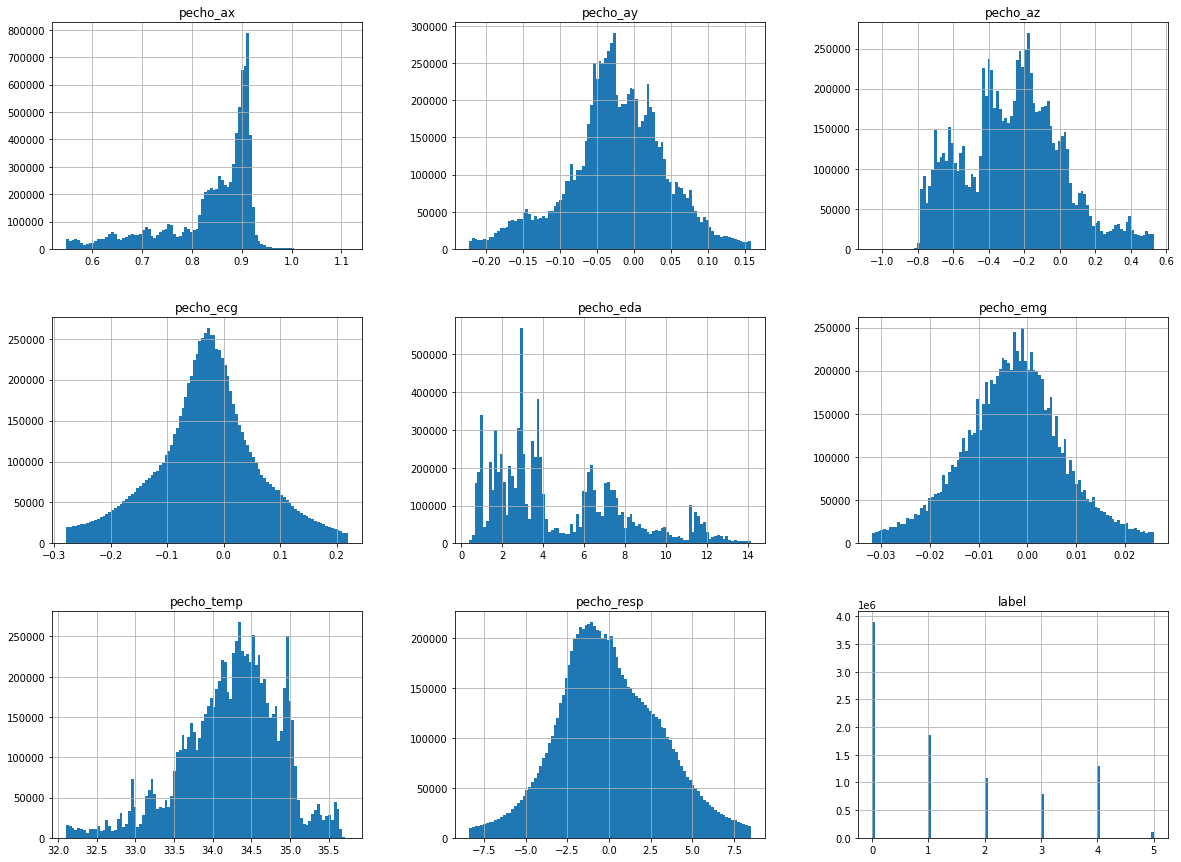

In [5]:
df_out.hist(bins=100,layout=(3,3), figsize = (20,15))

In [6]:
df_out.columns

Index(['pecho_ax', 'pecho_ay', 'pecho_az', 'pecho_ecg', 'pecho_eda',
       'pecho_emg', 'pecho_temp', 'pecho_resp', 'label'],
      dtype='object')

In [7]:
X_out = df_out.iloc[:,0:8].values
Y_out = df_out.iloc[:,8].values

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

array_transformed = scaler.fit_transform(X_out)

df_transformed = pd.DataFrame(array_transformed,columns=list(df_out.columns)[0:8])


In [9]:
df_transformed.describe()

,pecho_ax,pecho_ay,pecho_az,pecho_ecg,pecho_eda,pecho_emg,pecho_temp,pecho_resp
count,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06,9.035022e+06
mean,1.867303e-17,3.294205e-17,4.846936e-17,-5.098594e-17,-5.217376e-16,2.136578e-17,-8.812061e-16,-4.632082e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.166517e+00,-2.991584e+00,-2.873820e+00,-2.695885e+00,-1.403113e+00,-2.787365e+00,-3.383050e+00,-2.725879e+00
25%,-3.213846e-01,-5.182986e-01,-6.509803e-01,-5.604344e-01,-7.680793e-01,-6.322914e-01,-5.743802e-01,-6.687371e-01
50%,3.729229e-01,-3.157125e-03,3.762430e-02,2.304372e-02,-3.387743e-01,2.571262e-02,1.127715e-01,-7.370439e-02
75%,7.255525e-01,6.535742e-01,6.441153e-01,5.762563e-01,7.212864e-01,6.218908e-01,6.873774e-01,6.766403e-01
max,3.018741e+00,2.744269e+00,2.841024e+00,2.710218e+00,3.005209e+00,2.794629e+00,2.377591e+00,2.762470e+00


In [10]:
X_out_transfo = df_transformed.iloc[:,0:8].values

X_train, X_test, Y_train, Y_test = train_test_split(X_out_transfo,Y_out,test_size=0.25, random_state=9)

In [11]:
model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [12]:
#model_KNN.score(X_test,Y_test)
#0.93

In [13]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,Y_train)

model_tree.score(X_test, Y_test)

0.981263137762556

In [14]:
from sklearn.model_selection import GridSearchCV

param_tree = [
            {'max_depth':[5,10,20,30],'min_samples_leaf':[10,20,30,40,50]}
]

model_tree_grid = DecisionTreeClassifier()

grid_search = GridSearchCV(model_tree_grid, param_tree, cv=5, scoring='balanced_accuracy')

grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [5, 10, 20, 30],
                          'min_samples_leaf': [10, 20, 30, 40, 50]}],
             scoring='balanced_accuracy')

In [15]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.41969571394703653 {'max_depth': 5, 'min_samples_leaf': 10}
0.41969571394703653 {'max_depth': 5, 'min_samples_leaf': 20}
0.41969571394703653 {'max_depth': 5, 'min_samples_leaf': 30}
0.41969571394703653 {'max_depth': 5, 'min_samples_leaf': 40}
0.41969571394703653 {'max_depth': 5, 'min_samples_leaf': 50}
0.782479291576611 {'max_depth': 10, 'min_samples_leaf': 10}
0.7824132257358449 {'max_depth': 10, 'min_samples_leaf': 20}
0.7823688832636394 {'max_depth': 10, 'min_samples_leaf': 30}
0.7823326530821342 {'max_depth': 10, 'min_samples_leaf': 40}
0.7822994847324759 {'max_depth': 10, 'min_samples_leaf': 50}
0.966965596569119 {'max_depth': 20, 'min_samples_leaf': 10}
0.9652172123095994 {'max_depth': 20, 'min_samples_leaf': 20}
0.9634945621295413 {'max_depth': 20, 'min_samples_leaf': 30}
0.9619168147101661 {'max_depth': 20, 'min_samples_leaf': 40}
0.9604965617734532 {'max_depth': 20, 'min_samples_leaf': 50}
0.9690552206207288 {'max_depth': 30, 'min_samples_leaf': 10}
0.967592401601187 {'max_de

In [23]:
model_tree_best = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10)
model_tree_best.fit(X_train,Y_train)

model_tree_best.score(X_test, Y_test)

0.9569581663535149

In [24]:
from micromlgen import port

c_code = port(model_tree_best)
    
with open('model_tree_best5.h', 'w') as file:
    file.write(c_code)


In [25]:
X_test[10]

array([-0.15930679,  0.65959843, -0.66394571,  0.25970957, -0.41468499,
        0.24651935,  0.3766817 , -0.76024259])

In [29]:
model_tree_best.predict([X_test[10]])

array([2.])

In [30]:
param_tree2 = [
            {'max_depth':[12,15],'min_samples_leaf':[10,30], 'min_samples_split':[5,15,30]}
]

model_tree_grid2 = DecisionTreeClassifier()

grid_search2 = GridSearchCV(model_tree_grid2, param_tree2, cv=5, scoring='balanced_accuracy')

grid_search2.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [12, 15], 'min_samples_leaf': [10, 30],
                          'min_samples_split': [5, 15, 30]}],
             scoring='balanced_accuracy')

In [31]:
cvres2 = grid_search2.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"],cvres2["params"]):
    print(mean_score,params)

0.891492856293962 {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.8914895166376422 {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 15}
0.8914917984046824 {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 30}
0.8908777166124112 {'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 5}
0.8908792367861726 {'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 15}
0.890878813189871 {'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 30}
0.9379177696317458 {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.9379083181076957 {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 15}
0.9377891994250597 {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 30}
0.9363993497313323 {'max_depth': 15, 'min_samples_leaf': 30, 'min_samples_split': 5}
0.9363984698760079 {'max_depth': 15, 'min_samples_leaf': 30, 'min_samples_split': 15}
0.9363991038233236 {'max_depth': 15, 'min_samples_leaf': 30,

In [43]:
model_tree_best = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10, min_samples_split= 5 ,random_state=9)
model_tree_best.fit(X_train,Y_train)
#model_tree_best.fit(X_out_transfo,Y_out)
model_tree_best.score(X_test, Y_test)

#max_depth=15,min_samples_leaf=5, min_samples_split= 5 ,random_state=9 --> 0.95710
#max_depth=20,min_samples_leaf=10, min_samples_split= 5 ,random_state=9 --> 0.976962

0.9769620977210465

In [40]:
c_code = port(model_tree_best)
    
with open('tree_best.h', 'w') as file:
    file.write(c_code)